In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv', sep=',', encoding='iso-8859-1')

In [10]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


idade: idade do beneficiário principal

sexo: gênero do contratante do seguro, feminino, masculino

IMC: índice de massa corporal, fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura,
índice objetivo do peso corporal (kg / m ^ 2) usando a proporção de altura para peso, idealmente 18,5 a 24,9

crianças: número de crianças cobertas pelo seguro saúde / número de dependentes

fumante: fumante

região: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

encargos: custos médicos individuais cobrados pelo seguro saúde

In [11]:
df.shape

(1338, 7)

## **Exploração e tratamento dos dados**

**Valores Missing (NAN)**

In [5]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Tranformando string para número**

In [6]:
df2 = pd.DataFrame.copy(df)

In [7]:
df2['sex'].replace({'female':1, 'male': 2}, inplace=True)
df2['smoker'].replace({'yes':1 , 'no': 2}, inplace=True)
df2['region'].replace({'southwest':1, 'southeast': 2, 'northwest':3, 'northeast': 4}, inplace=True)

C:\Users\gusta\AppData\Local\Temp\ipykernel_17212\221175503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['sex'].replace({'female':1, 'male': 2}, inplace=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_17212\221175503.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['sex'].replace

In [8]:
df2.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

**Dados Estatísticos**

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Análise dos outliers**

In [10]:
import plotly.express as px

In [11]:
boxplot = px.box(df2, y="age")
boxplot.show()

In [12]:
boxplot = px.box(df2, y="bmi")
boxplot.show()

In [13]:
boxplot = px.box(df2, y="charges")
boxplot.show()

age: idade do beneficiário principal

sex: gênero do contratante do seguro, feminino, masculino

bmi: índice de massa corporal, fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura,
índice objetivo do peso corporal (kg / m ^ 2) usando a proporção de altura para peso, idealmente 18,5 a 24,9

children: número de crianças cobertas pelo seguro saúde / número de dependentes

smoker: fumante

region: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

**Variável alvo**

charges: custos médicos individuais cobrados pelo seguro saúde

## **Início**

### **Correlação linear**

In [26]:
import matplotlib.pyplot as plt

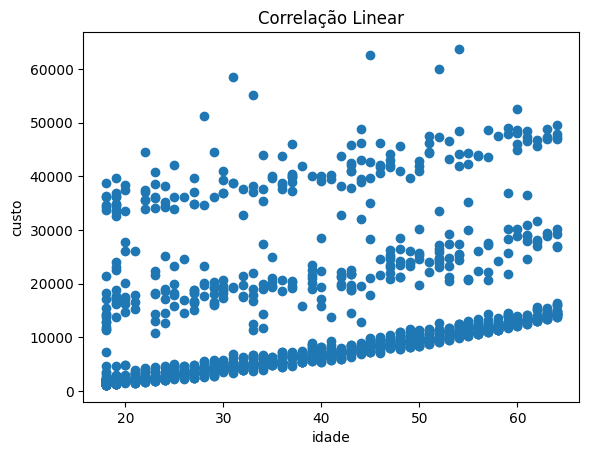

In [27]:
plt.scatter(df2.age, df2.charges)
plt.title('Correlação Linear')
plt.xlabel('idade')
plt.ylabel('custo')
plt.grid(False)

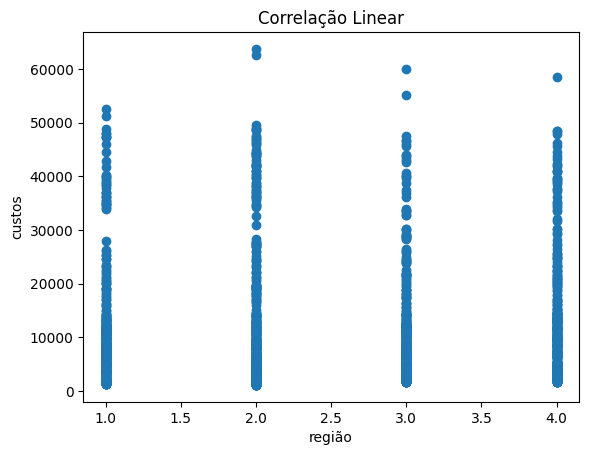

In [32]:
plt.scatter(df2.region, df2.charges)
plt.title('Correlação Linear')
plt.xlabel('região')
plt.ylabel('custos')
plt.grid(False)

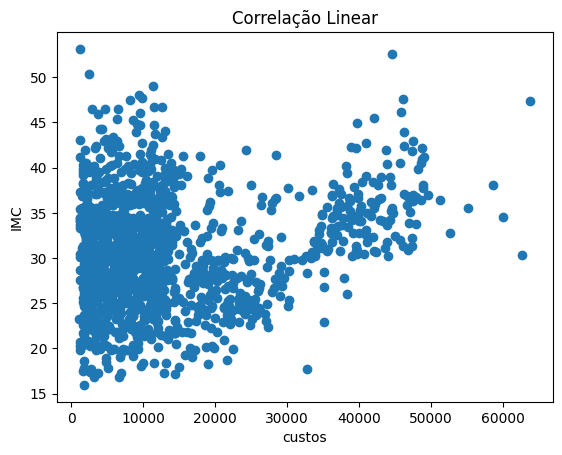

In [34]:
plt.scatter(df2.charges, df2.bmi)
plt.title('Correlação Linear')
plt.xlabel('custos')
plt.ylabel('IMC')
plt.grid(False)

In [35]:
import seaborn as sns

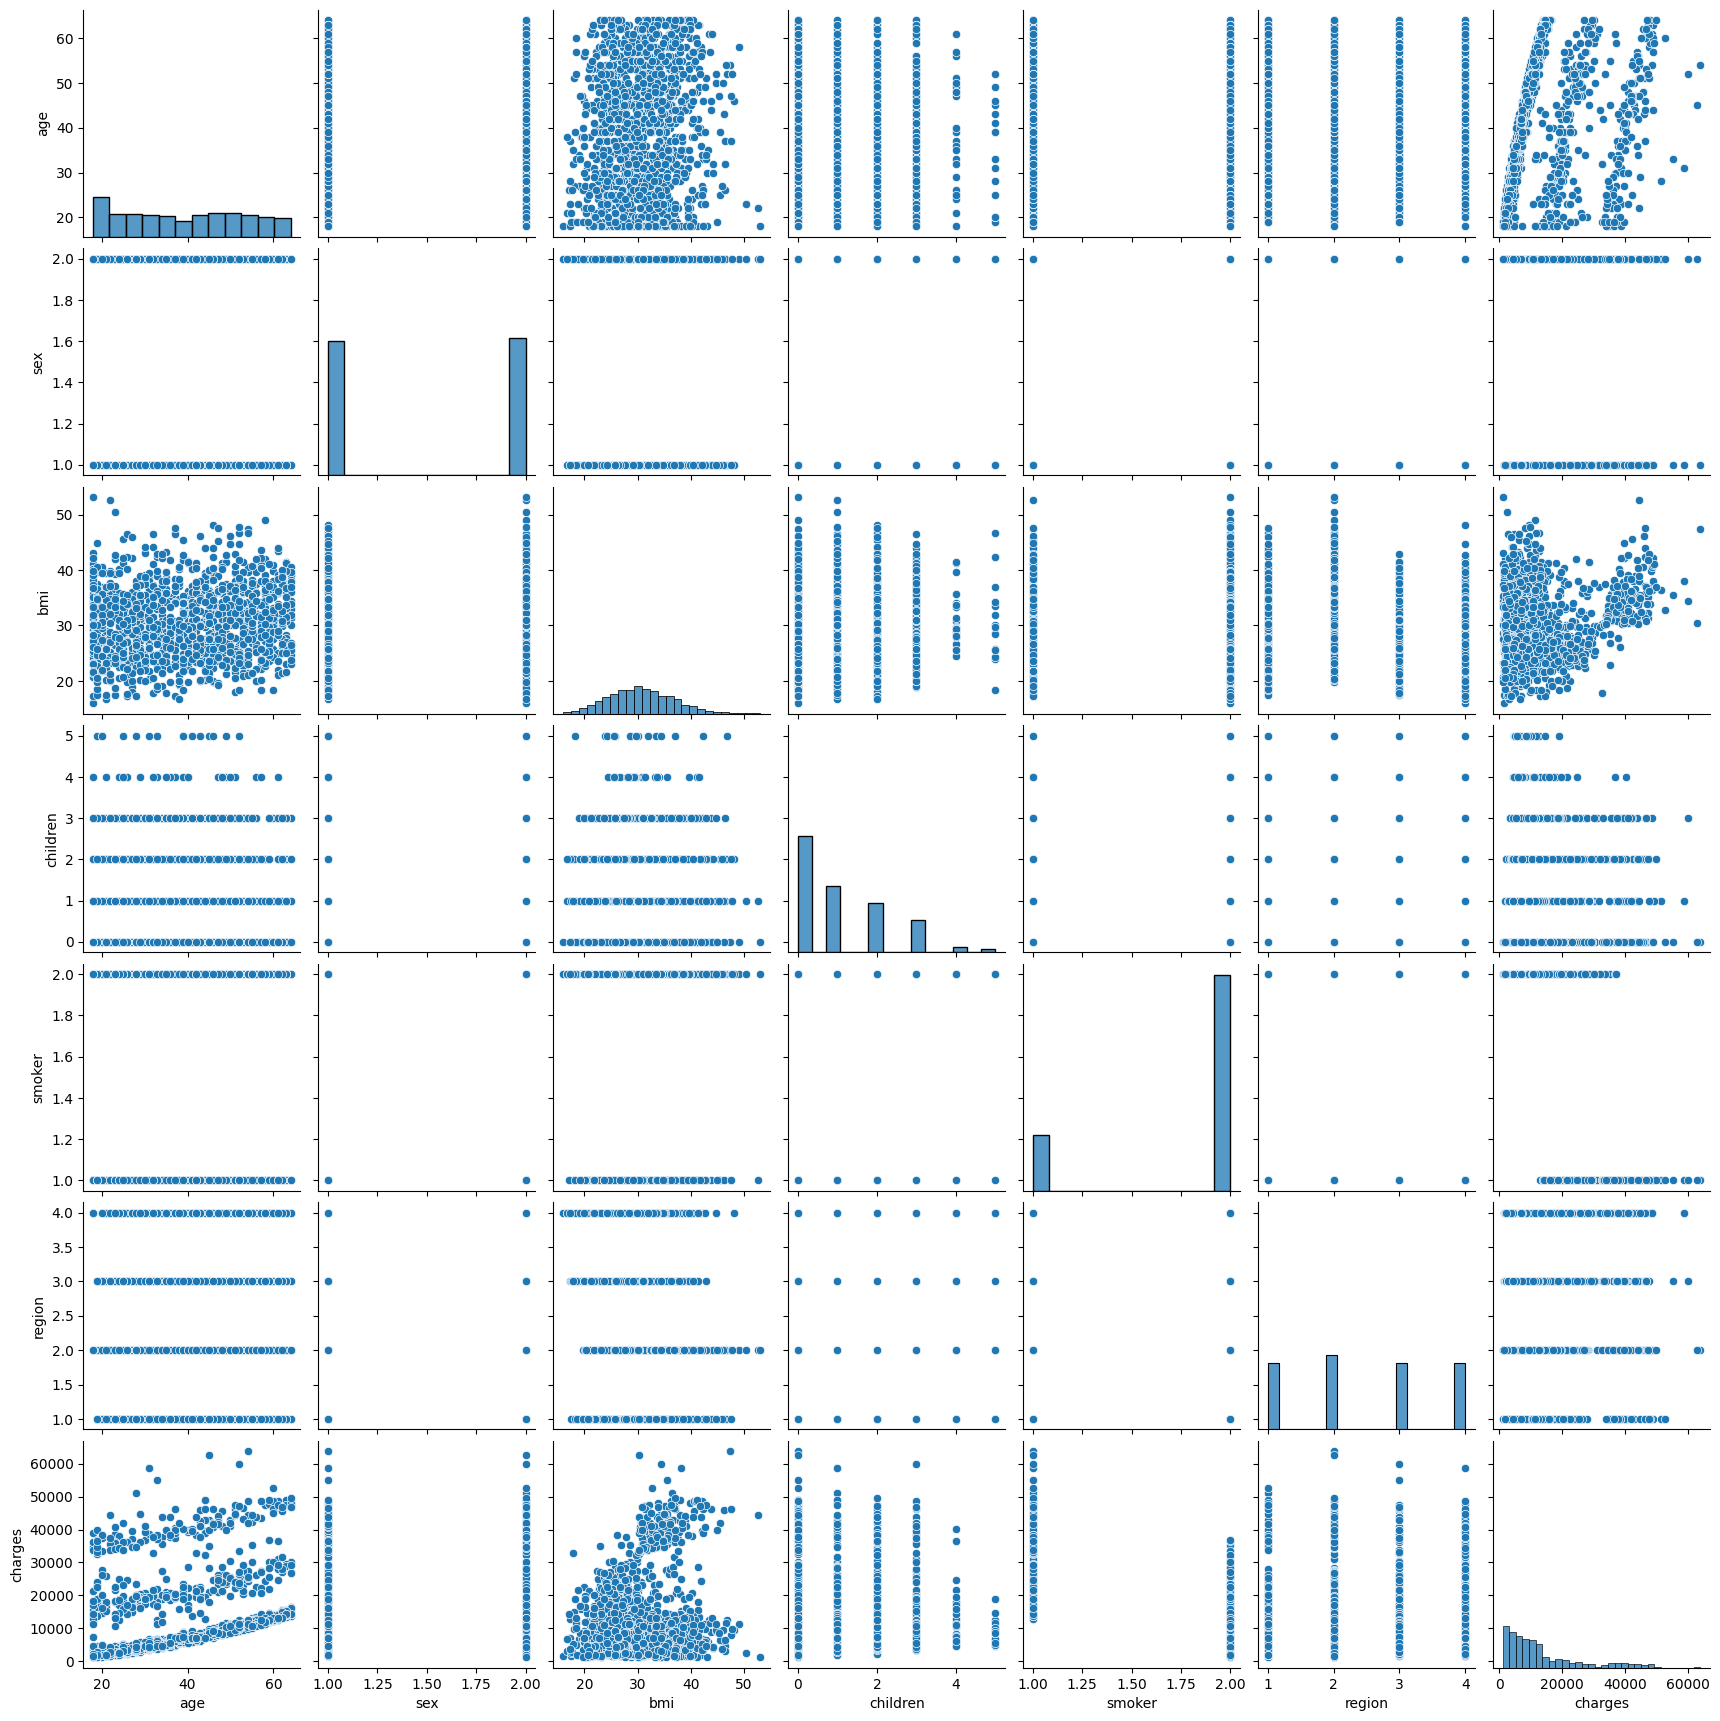

In [36]:
sns.pairplot(df2);

**Análise da Normalidade**

Gráfico QQ-Plot

In [37]:
import scipy.stats as stats

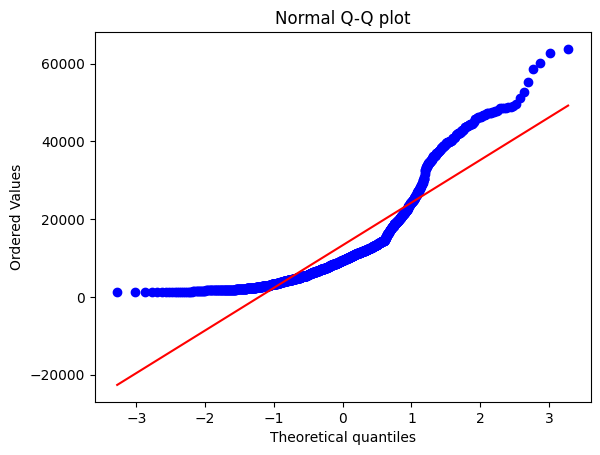

In [47]:
stats.probplot(df2['charges'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [41]:
import plotly.express as px

In [48]:
hist =  px.histogram (df2,  x = "charges", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

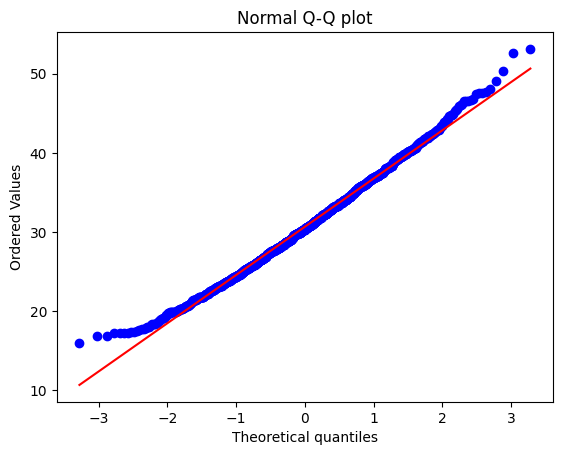

In [49]:
stats.probplot(df2['bmi'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [50]:
hist =  px.histogram (df2,  x = "bmi", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

In [52]:
hist =  px.histogram (df2,  x = "region", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

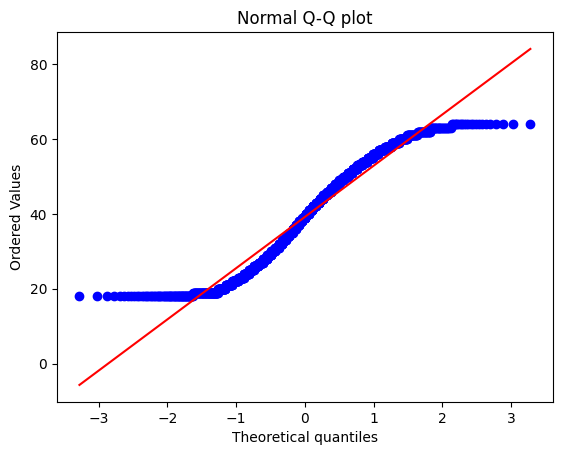

In [55]:
stats.probplot(df2['age'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [54]:
hist =  px.histogram (df2,  x = "age", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

**TESTE ESTATÍSTICO PARA ANALISAR QUAL MODELO USAR:**

Teste Shapiro-Wilk (até 5000 registros)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05


In [57]:
stats.shapiro(df2.charges)

ShapiroResult(statistic=0.8146881157362383, pvalue=1.1505226334932036e-36)

In [58]:
estatistica, p = stats.shapiro(df2.charges)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8146881157362383
p-valor: 1.1505226334932036e-36


In [59]:
estatistica, p = stats.shapiro(df2.age)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9447009637825445
p-valor: 5.69204692845418e-22


In [60]:
estatistica, p = stats.shapiro(df2.bmi)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9938864621676107
p-valor: 2.6046836879834408e-05


Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras (<30))

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [67]:
# Spearman
coef,p = stats.spearmanr(df2.charges, df2.bmi)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.11939590358331147
p-valor: 1.1926059544526826e-05


In [68]:
correlacoes = df2.corr(method='spearman')
correlacoes

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020809,0.107736,0.056992,0.025210,-0.004315,0.534392
sex,-0.020809,1.000000,0.044802,0.015589,-0.076185,-0.004614,0.009490
bmi,0.107736,0.044802,1.000000,0.015607,-0.002203,-0.152959,0.119396
children,0.056992,0.015589,0.015607,1.000000,-0.016583,-0.010604,0.133339
smoker,0.025210,-0.076185,-0.002203,-0.016583,1.000000,-0.002155,-0.663460
region,-0.004315,-0.004614,-0.152959,-0.010604,-0.002155,1.000000,0.043531
charges,0.534392,0.009490,0.119396,0.133339,-0.663460,0.043531,1.000000


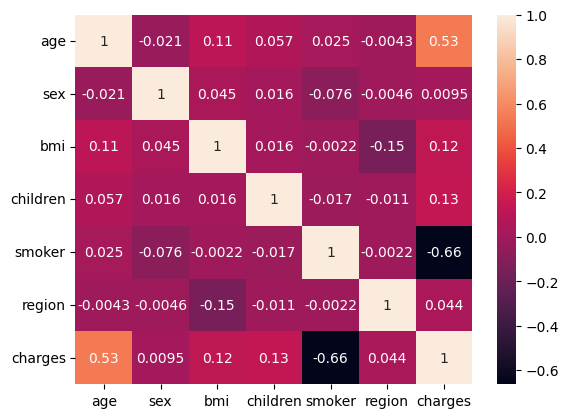

In [69]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

### **Regressão Linear Simples**

Valor do custo (charges) em função da idade (age)

In [502]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [503]:
x1 = df2.iloc[:,0:1].values
x1

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [504]:
y = df2.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [505]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [506]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [507]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [508]:
from sklearn.linear_model import LinearRegression

In [509]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [510]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

2428.663437987354

In [511]:
# Coeficiente Angular
reg_linear1.coef_

array([281.01394743])

In [512]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.10386818385382757

In [513]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

0.04432028433481028

In [514]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([ 8329.95633412, 10297.05396616, 18446.45844177,  8329.95633412,
       12545.16554564, 13107.19344051, 13388.20738794, 20132.54212637,
        8329.95633412, 12826.17949307, 20413.55607381, 17884.4305469 ,
       17041.38870459,  8610.97028155, 13107.19344051, 14512.26317768,
       13669.22133538,  8610.97028155,  7767.92843925, 10016.04001872,
       13388.20738794, 17603.41659946, 18727.4723892 , 20132.54212637,
       20413.55607381, 13669.22133538, 17041.38870459,  7486.91449181,
       12264.1515982 , 14793.27712511,  8329.95633412, 14231.24923025,
       15917.33291485, 12826.17949307, 19851.52817894, 18727.4723892 ,
        7767.92843925, 17322.40265203,  7767.92843925, 11140.09580846,
       12826.17949307,  9735.02607129, 18165.44449433, 17884.4305469 ,
        8048.94238668, 10016.04001872, 16198.34686229, 10859.08186103,
       19851.52817894, 19289.50028407, 13107.19344051,  7767.92843925,
        8610.97028155, 12264.1515982 , 20413.55607381, 14231.24923025,
      

In [515]:
import matplotlib.pyplot as plt

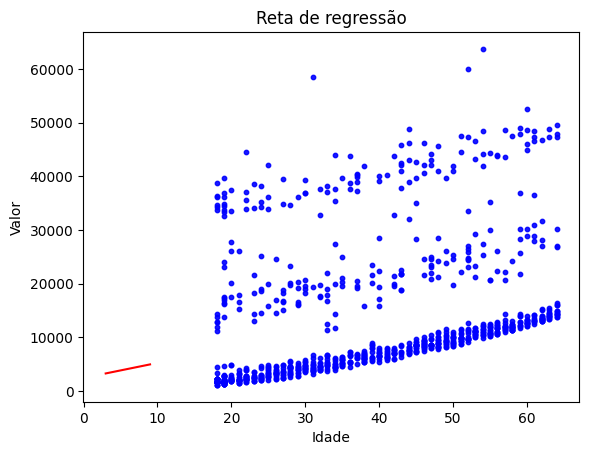

In [516]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor')
plt.xlabel('Idade')
plt.show()

In [517]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([12826.17949307, 12545.16554564, 19008.48633664, 19570.51423151,
       10578.06791359, 13950.23528281, 15074.29107255,  8048.94238668,
       14793.27712511, 14512.26317768,  8329.95633412,  9735.02607129,
       14512.26317768, 13950.23528281, 15917.33291485, 19289.50028407,
        9454.01212386, 20132.54212637, 18165.44449433, 12545.16554564,
       14793.27712511,  7767.92843925,  7486.91449181, 13107.19344051,
       10297.05396616, 19008.48633664, 14793.27712511, 17603.41659946,
        9735.02607129, 13388.20738794,  7767.92843925, 13388.20738794,
       15074.29107255, 14793.27712511, 10578.06791359, 12264.1515982 ,
       19851.52817894, 17041.38870459, 16479.36080972, 14793.27712511,
       20132.54212637, 16479.36080972, 12545.16554564, 14793.27712511,
        7486.91449181, 14231.24923025, 15636.31896742, 13950.23528281,
       19008.48633664, 18165.44449433,  8891.98422899, 10297.05396616,
       15074.29107255, 18727.4723892 , 17322.40265203, 19570.51423151,
      

In [518]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

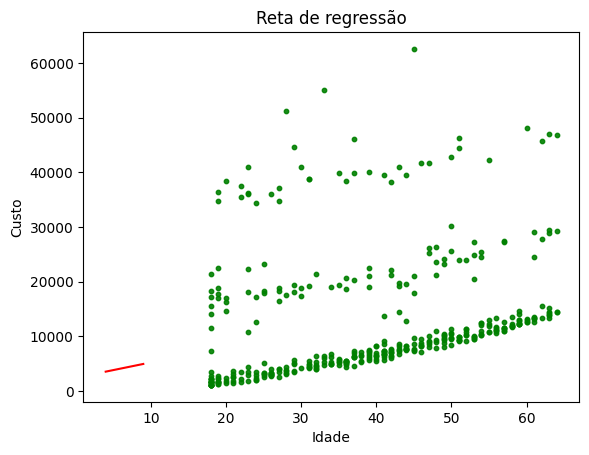

In [519]:
plt.scatter(y=y_teste, x=x_teste, color='green', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Custo')
plt.xlabel('Idade')
plt.show()

In [520]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

array([3552.71922773])

**Métricas de Desempenho**

In [521]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [522]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

8829.869512552259

In [523]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

124102543.68297596

In [524]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11140.13212143267

Valor do custo (charges) em função do fumante (smoker)

In [525]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [678]:
x2 = df2.iloc[:,4:5].values
x2

array([[1],
       [2],
       [2],
       ...,
       [2],
       [2],
       [1]], dtype=int64)

In [675]:
y = df2.iloc[:, 6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [632]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [676]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [677]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [638]:
from sklearn.linear_model import LinearRegression

In [639]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [640]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

56680.191037476965

In [641]:
# Coeficiente Angular
reg_linear1.coef_

array([-24100.71108188])

In [642]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.6189465597859612

In [643]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

0.6197902354385714

In [644]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
       32579.4799556 , 32579.4799556 , 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371, 32579.4799556 , 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
      

In [538]:
import matplotlib.pyplot as plt

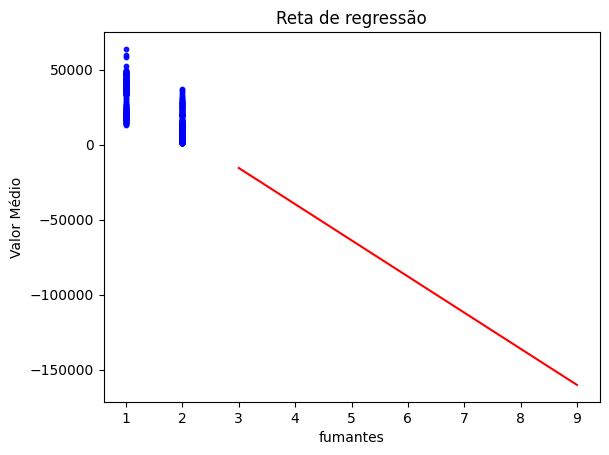

In [589]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('fumantes')
plt.show()

In [645]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([ 8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371, 32579.4799556 ,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
       32579.4799556 ,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371, 32579.4799556 ,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371, 32579.4799556 ,
        8478.76887371,  8478.76887371, 32579.4799556 ,  8478.76887371,
        8478.76887371,  8478.76887371,  8478.76887371,  8478.76887371,
      

In [646]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

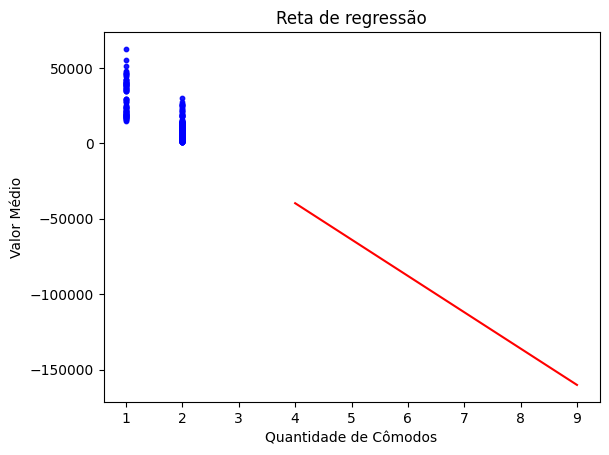

In [647]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [648]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[5]])
valor_casa

array([-63823.36437193])

**Métricas de Desempenho**

In [649]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [650]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

5361.4579431801685

In [651]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

49373234.71633605

In [652]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

7026.6090482064

**Validação Cruzada**

In [653]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [654]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [655]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([0.6828035 , 0.48697994, 0.70175622, 0.557086  , 0.60701629,
       0.56623409, 0.63480107, 0.41548201, 0.62212295, 0.65191741,
       0.59351143, 0.60447024, 0.70552853, 0.6279265 , 0.59229601])

In [656]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 60.33%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

### **Regressão Linear Múltipla**

In [850]:
from sklearn.linear_model import LinearRegression

In [851]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [852]:
independente = df2.iloc[:, 4:5].values
independente

array([[1],
       [2],
       [2],
       ...,
       [2],
       [2],
       [1]], dtype=int64)

In [872]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [854]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [855]:
x_treino.shape, x_teste.shape

((936, 1), (402, 1))

In [856]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [857]:
multipla.intercept_

54098.30100444898

In [858]:
multipla.coef_

array([-22740.78473655])

In [859]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.5934374063413763

**Teste**

In [860]:
previsoes = multipla.predict(x_teste)
previsoes

array([ 8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134, 31357.51626789,
       31357.51626789,  8616.73153134,  8616.73153134, 31357.51626789,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134, 31357.51626789,
        8616.73153134,  8616.73153134, 31357.51626789,  8616.73153134,
        8616.73153134, 31357.51626789, 31357.51626789,  8616.73153134,
        8616.73153134,  8616.73153134, 31357.51626789, 31357.51626789,
       31357.51626789,  8616.73153134,  8616.73153134,  8616.73153134,
        8616.73153134,  8616.73153134,  8616.73153134,  8616.73153134,
       31357.51626789, 31357.51626789,  8616.73153134,  8616.73153134,
      

In [861]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [862]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.6713300243415388

In [863]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6]])
valor_casa

array([-82346.40741488])

**Métricas**

In [864]:
# Erro absoluto
abs(y_teste - previsoes).mean()

5626.590204101529

In [865]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [866]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

5626.590204101529

In [867]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

7239.6702422029775

**Validação Cruzada**

In [868]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [869]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [870]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.6828035 , 0.48697994, 0.70175622, 0.557086  , 0.60701629,
       0.56623409, 0.63480107, 0.41548201, 0.62212295, 0.65191741,
       0.59351143, 0.60447024, 0.70552853, 0.6279265 , 0.59229601])

In [871]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 60.33%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

### **Regressão Linear Múltipla**

In [1403]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1423]:
independente = df2.iloc[:, 4:5].values
independente

array([[1],
       [2],
       [2],
       ...,
       [2],
       [2],
       [1]], dtype=int64)

In [1405]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1406]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1407]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1408]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [1409]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [1410]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[ 1., 18.,  1., ...,  4.,  8., 16.],
       [ 1., 39.,  1., ...,  4.,  2.,  1.],
       [ 1., 52.,  1., ...,  4.,  4.,  4.],
       ...,
       [ 1., 40.,  2., ...,  4.,  4.,  4.],
       [ 1., 19.,  2., ...,  4.,  6.,  9.],
       [ 1., 33.,  1., ...,  4.,  2.,  1.]])

In [1411]:
polinomial = LinearRegression()

In [1412]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [1413]:
previsoes_treino = polinomial.predict(x_poly)

In [1414]:
polinomial.coef_

array([ 1.38206180e+14, -1.51975076e+02,  3.97631065e+01,  2.73596239e+03,
       -3.95312653e+02,  1.77064460e+03, -2.05851214e+03,  4.37423590e+00,
       -1.85573640e+01,  3.01159952e+00,  6.30775712e+00,  2.26165218e+01,
       -1.61160967e+01,  1.19289320e+02, -1.33910744e+02, -7.73901811e+02,
        1.06388547e+03,  1.31948159e+03,  1.36447578e+00,  1.33670306e+01,
       -1.41280179e+03,  4.03677445e+01, -1.74970063e+02,  6.79061777e+02,
        3.95543954e+02,  5.31193379e+03, -5.55554103e+02,  1.10764278e+02])

In [1415]:
polinomial.intercept_

-138206179881051.22

**Equação:**

Valor = 4685.38 - 190.55*RM + 0.58*RM^2

In [1416]:
numeros = np.linspace(3,9.84,342)
numeros

array([3.        , 3.02005865, 3.0401173 , 3.06017595, 3.0802346 ,
       3.10029326, 3.12035191, 3.14041056, 3.16046921, 3.18052786,
       3.20058651, 3.22064516, 3.24070381, 3.26076246, 3.28082111,
       3.30087977, 3.32093842, 3.34099707, 3.36105572, 3.38111437,
       3.40117302, 3.42123167, 3.44129032, 3.46134897, 3.48140762,
       3.50146628, 3.52152493, 3.54158358, 3.56164223, 3.58170088,
       3.60175953, 3.62181818, 3.64187683, 3.66193548, 3.68199413,
       3.70205279, 3.72211144, 3.74217009, 3.76222874, 3.78228739,
       3.80234604, 3.82240469, 3.84246334, 3.86252199, 3.88258065,
       3.9026393 , 3.92269795, 3.9427566 , 3.96281525, 3.9828739 ,
       4.00293255, 4.0229912 , 4.04304985, 4.0631085 , 4.08316716,
       4.10322581, 4.12328446, 4.14334311, 4.16340176, 4.18346041,
       4.20351906, 4.22357771, 4.24363636, 4.26369501, 4.28375367,
       4.30381232, 4.32387097, 4.34392962, 4.36398827, 4.38404692,
       4.40410557, 4.42416422, 4.44422287, 4.46428152, 4.48434

In [1417]:
valor = 4685.38 -190.55*numeros + 0.58*numeros**2

In [1418]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

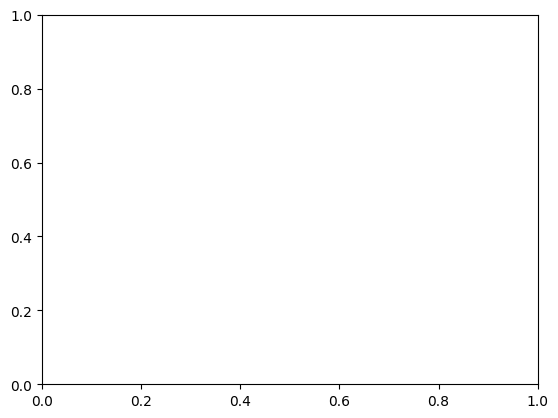

In [1419]:
plt.scatter(x_treino, y_treino, c = "green")
plt.xlabel("fumante")
plt.ylabel("Valor")
plt.title("Previsão dos valor: dados de treino")
plt.plot(numeros, valor);

In [893]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[1.000e+00, 5.200e+01, 2.704e+03],
       [1.000e+00, 4.700e+01, 2.209e+03],
       [1.000e+00, 4.800e+01, 2.304e+03],
       ...,
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 6.200e+01, 3.844e+03]])

In [894]:
polinomial_teste = LinearRegression()

In [895]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [896]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

0.11208508336758083

In [897]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [898]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [899]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11805.907036761764

**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

### **Regressão de Vetores por Suporte**

In [1112]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1113]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1114]:
independente.shape

(1338, 6)

In [1115]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1116]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1117]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1118]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='linear')
SVR.fit(x_treino,y_treino)

SVR(kernel='linear')

In [1119]:
SVR.score(x_treino, y_treino)

-0.15330038049855488

In [1120]:
SVR.score(x_teste, y_teste)

-0.11368119079119032

**Padronização de escala**

In [1121]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [1122]:
x_treino_scaler

array([[-1.5330973 , -0.97676557, -0.40713453, -0.89833872,  0.50466988,
         1.40820029],
       [-0.03364163, -0.97676557,  0.32855417, -0.89833872,  0.50466988,
        -1.31322188],
       [ 0.89459283, -0.97676557,  2.56690911,  3.25603402,  0.50466988,
        -0.40608116],
       ...,
       [ 0.03776102,  1.02378711, -0.91016269, -0.89833872,  0.50466988,
        -0.40608116],
       [-1.46169465,  1.02378711,  0.76659782, -0.89833872,  0.50466988,
         0.50105957],
       [-0.46205754, -0.97676557, -1.96596021, -0.06746417,  0.50466988,
        -1.31322188]])

In [1123]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [1091]:
y_treino_scaler

array([[-9.29114569e-01],
       [-6.38651947e-01],
       [-5.39325234e-02],
       [-4.89603748e-01],
       [-6.71349717e-01],
       [-9.67549383e-01],
       [ 1.99311860e+00],
       [-7.49986519e-03],
       [-5.43346082e-01],
       [-2.11871148e-02],
       [-3.93810261e-01],
       [-6.34346126e-02],
       [ 2.99749417e+00],
       [-8.24494558e-01],
       [-4.46162315e-01],
       [ 2.82436277e-01],
       [ 1.14345861e-01],
       [-9.85403479e-01],
       [-5.30554176e-01],
       [-9.27713303e-01],
       [-1.15928290e-01],
       [ 5.03782109e-01],
       [-1.43008068e-01],
       [ 2.33634863e+00],
       [-7.02715735e-01],
       [ 1.74120307e+00],
       [ 2.98421635e-01],
       [-1.89528398e-01],
       [-4.38466738e-01],
       [ 2.63340976e+00],
       [-4.17078733e-01],
       [-7.99784555e-01],
       [-3.51547052e-01],
       [ 4.66138790e-01],
       [ 1.93407799e+00],
       [ 4.94776882e-01],
       [ 1.04631189e+00],
       [ 2.18064123e+00],
       [-7.8

In [1092]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.89459283,  1.02378711, -0.08863026, -0.06746417,  0.50466988,
        -1.31322188],
       [ 0.53757957, -0.97676557, -0.22180837, -0.06746417,  0.50466988,
        -0.40608116],
       [ 0.60898222,  1.02378711,  1.57449152,  0.76341038, -1.98149332,
         0.50105957],
       ...,
       [ 1.10880078,  1.02378711,  1.20785059, -0.89833872,  0.50466988,
        -0.40608116],
       [ 1.75142463,  1.02378711,  1.34905148, -0.06746417,  0.50466988,
        -0.40608116],
       [ 1.60861933, -0.97676557, -0.92299913, -0.89833872,  0.50466988,
        -1.31322188]])

In [1093]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

In [1094]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='linear')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

SVR(kernel='linear')

In [1095]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.6702448292343373

**TESTE**

In [1096]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.7606489530124314

In [1097]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

array([-0.26072044, -0.33567549,  2.28927172, -0.00333035, -0.35246045,
       -0.71121837, -1.00272919, -0.10389125, -0.43769924, -0.61090531,
       -0.59362202, -0.23936252, -0.43696495, -0.72004005,  1.66061334,
       -0.20478211, -0.13127439, -0.76751167, -0.50662906,  1.5392214 ,
        2.23686212, -0.04953978, -0.21694127,  2.10566318, -0.9168757 ,
       -0.59842829, -0.84965062, -0.38936493, -0.75347873, -0.34261961,
       -0.40493807,  2.4829994 , -0.02235011, -0.1778154 ,  1.57603739,
       -0.72535021, -0.27961331,  1.74528971,  2.07874504, -0.95655956,
       -0.65352728, -0.80605085,  1.92697356,  2.48311386,  1.53261305,
       -0.83168408, -0.20726631, -0.47723998, -0.73355629, -0.15523301,
       -0.82785673, -0.87479677,  2.12409107,  2.40776694, -0.0350044 ,
       -0.73798683, -0.81604753, -0.33655894, -0.3306014 , -0.09442599,
       -1.03821961,  2.56259978,  0.02856892, -0.25226703, -0.14712724,
       -0.18788284,  1.48010077,  1.90390499, -0.9297822 , -0.37

In [1098]:
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

**Revertendo a transformação**

In [1099]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [1100]:
y_teste_inverse

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [1101]:
previsoes_inverse

array([[10137.18387044],
       [ 9247.18541449],
       [40415.18491549],
       [13193.37267906],
       [ 9047.8848036 ],
       [ 4788.07853789],
       [ 1326.74831047],
       [11999.33644176],
       [ 8035.77974024],
       [ 5979.17196131],
       [ 6184.38970089],
       [10390.7827963 ],
       [ 8044.4984316 ],
       [ 4683.3319749 ],
       [32950.64467861],
       [10801.38240797],
       [11674.19557374],
       [ 4119.66528548],
       [ 7217.32335005],
       [31509.26566625],
       [39792.88575418],
       [12644.69292717],
       [10657.00743438],
       [38235.06078289],
       [ 2346.15222506],
       [ 6127.32118055],
       [ 3144.36690185],
       [ 8609.6897778 ],
       [ 4286.28907753],
       [ 9164.73263114],
       [ 8424.77803464],
       [42715.46140633],
       [12967.53653055],
       [11121.57863155],
       [31946.40990814],
       [ 4620.28044393],
       [ 9912.85449163],
       [33956.07177167],
       [37915.44108957],
       [ 1874.95552096],


**MÉTRICAS**

In [1102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1103]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

3204.691699332041

In [1104]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

6178.12135171605

**Validação Cruzada**

**Padronização de escala**

In [1105]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [1106]:
independente_scaler


array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         0.46691549]])

In [1107]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [1108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1109]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [1110]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.90259745, 0.80358972, 0.88424444, 0.84111929, 0.83133121,
       0.74992377, 0.90977249, 0.67729737, 0.83081009, 0.88170447,
       0.83334191, 0.85319396, 0.85749765, 0.83439254, 0.83385632])

In [1111]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 83.50%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

### **Regressão com Árvore de Decisão**

In [1200]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1201]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1202]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1203]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1204]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1205]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [1206]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [1207]:
arvore.score(x_treino, y_treino)

0.8753111250530279

**TESTE**

In [1208]:
arvore.score(x_teste, y_teste)

0.8239135295086505

In [1209]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

array([11839.80721163,  9258.80334932, 41896.67127447, 15240.29968833,
       11564.04733484,  7125.37182402,  3064.76344858,  9258.80334932,
        7125.37182402,  7125.37182402,  7125.37182402, 11564.04733484,
        9258.80334932,  5217.35429405, 19099.57786744,  9258.80334932,
       15240.29968833,  4528.30711673,  7125.37182402, 33705.2506    ,
       24582.06236882, 14800.61554821, 11839.80721163, 26745.56683125,
        3064.76344858,  7125.37182402,  7125.37182402,  7589.23995085,
        5217.35429405,  9258.80334932,  7125.37182402, 46847.68208429,
       15240.29968833, 11839.80721163, 19099.57786744,  7125.37182402,
        9258.80334932, 41405.620994  , 41896.67127447,  3064.76344858,
        7125.37182402,  5217.35429405, 19099.57786744, 46847.68208429,
       37517.02964286,  3064.76344858,  9258.80334932,  7125.37182402,
        7125.37182402, 11839.80721163,  4528.30711673,  3064.76344858,
       26745.56683125, 46847.68208429, 11839.80721163,  7125.37182402,
      

In [1210]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**MÉTRICAS**

In [1211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1212]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2842.520103410799

In [1213]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

5299.095702314922

**Validação Cruzada**

In [1214]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1215]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [1216]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.91127325, 0.81901877, 0.88672059, 0.7692046 , 0.87075135,
       0.76383865, 0.9013885 , 0.63250802, 0.85136365, 0.8305891 ,
       0.80959701, 0.86454659, 0.86038145, 0.8424176 , 0.84221843])

In [1217]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.04%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

### **Regressão com Random Forest**

In [1218]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1219]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1221]:
dependente = df.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1222]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1223]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1224]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [1225]:
from sklearn.ensemble import RandomForestRegressor

In [1273]:
random = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=8, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=8, n_estimators=50, random_state=10)

In [1274]:
random.score(x_treino, y_treino)

0.9470091620623807

**TESTE**

In [1275]:
random.score(x_teste, y_teste)

0.8702548854740428

In [1263]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([10746.98755992, 10444.51039648, 45393.94481253, 13562.51505267,
       10959.97268758,  9465.45856754,  2386.01463602, 12827.03845618,
        7009.32004446,  6424.74529268,  7770.04072168, 15055.19060908,
        8217.32032468,  5152.18364255, 22444.67145147, 12631.28088893,
       13688.12839588,  5860.95345445,  6856.0714152 , 34329.7923745 ,
       23728.62539937, 15815.75722537, 11899.59323645, 27038.35906073,
        3360.69122757,  8734.37437632,  6774.59277362,  7247.51416266,
        4192.48142006,  9239.42388921,  7051.87530033, 47417.48077039,
       14039.55256066, 11780.81803459, 17687.91176866,  4598.37747369,
        8974.78880002, 37993.2911409 , 39621.64806438,  3617.53825568,
        8774.15139857,  4366.39422085, 20728.80131666, 46987.66330651,
       37268.69322583,  3945.52474376, 12952.66666099,  7011.91014922,
        6478.263579  , 12822.49229416,  3556.31582565,  3936.82801077,
       26448.88268036, 48209.18667915, 11711.37827195,  8210.78139901,
      

In [1264]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**MÉTRICAS**

In [1265]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1266]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2636.482732281625

In [1267]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4426.927175303941

**Validação Cruzada**

In [1268]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1269]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [1271]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=8, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.90816283, 0.82476782, 0.88975018, 0.83087215, 0.87740228,
       0.76449642, 0.91154831, 0.66721213, 0.83680007, 0.85030441,
       0.82235208, 0.86144343, 0.8620618 , 0.83619612, 0.84832509])

In [1272]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.94%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

**Regressão com Random Forest** : Raiz do erro quadrático médio 4426.9; Validação Cruzada: 83.94%

### **Regressão com Xgboost**

In [1276]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1283]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1285]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1286]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1304]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1287]:
from xgboost import XGBRegressor

In [1317]:
xgboost = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [1318]:
xgboost.score(x_treino, y_treino)

0.9311809474538364

**TESTE**

In [1319]:
xgboost.score(x_teste, y_teste)

0.8704775883427067

In [1320]:
previsoes_teste = xgboost.predict(x_teste)

**MÉTRICAS**

In [1322]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1323]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2806.88642002851

In [1324]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4544.7628878406495

**Validação Cruzada**

In [1325]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1326]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, objective="reg:squarederror", random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.91641112, 0.80026465, 0.88552949, 0.82860101, 0.86970039,
       0.77245687, 0.91827264, 0.6845303 , 0.84216539, 0.86938611,
       0.84115923, 0.86503204, 0.8640421 , 0.85327412, 0.8454412 ])

In [1327]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação Médio: 84.38%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

**Regressão com Random Forest** : Raiz do erro quadrático médio 4426.9; Validação Cruzada: 83.94%

**Regressão com Xgboost** : Raiz do erro quadrático médio 4544.7; Validação Cruzada: 84.38%

### **Regressão com Light GBM**

In [1328]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1330]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1332]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1333]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1334]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1335]:
import lightgbm as lgb

In [1362]:
lgbm = lgb.LGBMRegressor(num_leaves=100, max_depth=10, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 6
[LightGBM] [Info] Start training from score 13232.916456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(max_depth=10, n_estimators=50, num_leaves=100, random_state=10)

In [1363]:
lgbm.score(x_treino, y_treino)

0.911637099757593

**TESTE**

In [1364]:
lgbm.score(x_teste, y_teste)

0.8769649446619704

In [1365]:
previsoes_teste = lgbm.predict(x_teste)

**MÉTRICAS**

In [1367]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1368]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2679.691457601611

In [1369]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4429.48467256467

**Validação Cruzada**

In [1370]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1371]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [1373]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=100, max_depth=10, learning_rate=0.1, n_estimators=50, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 6
[LightGBM] [Info] Start training from score 13326.503987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

array([0.9097186 , 0.83414829, 0.88815101, 0.8582435 , 0.87505162,
       0.77363971, 0.91538244, 0.6589888 , 0.83293438, 0.86142163,
       0.8493045 , 0.86649596, 0.86873478, 0.85577584, 0.84155201])

In [1374]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 84.60%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

**Regressão com Random Forest** : Raiz do erro quadrático médio 4426.9; Validação Cruzada: 83.94%

**Regressão com Xgboost** : Raiz do erro quadrático médio 4544.7; Validação Cruzada: 84.38%

**Regressão com Light GBM** : Raiz do erro quadrático médio 4429.4; Validação Cruzada: 84.60%

### **Regressão com Catboost**

In [1376]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [1378]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1380]:
dependente = df.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1381]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [1382]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [1383]:
from catboost.core import CatBoostRegressor

In [1384]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

0:	learn: 11240.1026458	total: 130ms	remaining: 12.8s
1:	learn: 10654.7071708	total: 133ms	remaining: 6.52s
2:	learn: 10030.5569163	total: 135ms	remaining: 4.36s
3:	learn: 9519.3103937	total: 137ms	remaining: 3.29s
4:	learn: 9037.2452657	total: 139ms	remaining: 2.64s
5:	learn: 8613.1524433	total: 142ms	remaining: 2.22s
6:	learn: 8179.2756363	total: 144ms	remaining: 1.92s
7:	learn: 7799.7525820	total: 147ms	remaining: 1.69s
8:	learn: 7482.7972220	total: 149ms	remaining: 1.5s
9:	learn: 7175.6051636	total: 151ms	remaining: 1.36s
10:	learn: 6894.1539848	total: 153ms	remaining: 1.24s
11:	learn: 6639.6032923	total: 155ms	remaining: 1.14s
12:	learn: 6415.7730074	total: 158ms	remaining: 1.05s
13:	learn: 6216.4343030	total: 159ms	remaining: 979ms
14:	learn: 6046.2137301	total: 161ms	remaining: 914ms
15:	learn: 5886.0289621	total: 164ms	remaining: 863ms
16:	learn: 5728.0536335	total: 166ms	remaining: 811ms
17:	learn: 5589.4206269	total: 168ms	remaining: 765ms
18:	learn: 5482.3051678	total: 170ms

In [1385]:
catboost.score(x_treino, y_treino)

0.8799037209705975

**TESTE**

In [1386]:
catboost.score(x_teste, y_teste)

0.8915872291968711

In [1387]:
previsoes_teste = catboost.predict(x_teste)

**MÉTRICAS**

In [1388]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1389]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2468.512954233579

In [1390]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4157.947398780364

**Validação Cruzada**

In [1391]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1392]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [1393]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

0:	learn: 11395.9342733	total: 36.4ms	remaining: 3.6s
1:	learn: 10769.8693862	total: 45.5ms	remaining: 2.23s
2:	learn: 10120.2332423	total: 49.6ms	remaining: 1.6s
3:	learn: 9569.5510783	total: 51.8ms	remaining: 1.24s
4:	learn: 9087.2140677	total: 54.2ms	remaining: 1.03s
5:	learn: 8629.3696757	total: 57.5ms	remaining: 900ms
6:	learn: 8175.8580943	total: 59.4ms	remaining: 790ms
7:	learn: 7775.7148341	total: 61.9ms	remaining: 712ms
8:	learn: 7406.5277731	total: 63.9ms	remaining: 646ms
9:	learn: 7089.4268905	total: 66.3ms	remaining: 597ms
10:	learn: 6802.5774847	total: 69.2ms	remaining: 560ms
11:	learn: 6563.7810609	total: 72.5ms	remaining: 532ms
12:	learn: 6344.4180867	total: 74.1ms	remaining: 496ms
13:	learn: 6124.1669458	total: 80.7ms	remaining: 496ms
14:	learn: 5957.2189083	total: 83.3ms	remaining: 472ms
15:	learn: 5780.2302667	total: 86ms	remaining: 452ms
16:	learn: 5626.1541661	total: 89.2ms	remaining: 436ms
17:	learn: 5484.9564216	total: 91.4ms	remaining: 416ms
18:	learn: 5355.23526

array([0.92089891, 0.82740509, 0.88455949, 0.85746308, 0.87381577,
       0.77472517, 0.92438182, 0.69092122, 0.85073329, 0.8848095 ,
       0.85627198, 0.87824844, 0.87971907, 0.86295223, 0.85477117])

In [1394]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 85.48%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

**Regressão com Random Forest** : Raiz do erro quadrático médio 4426.9; Validação Cruzada: 83.94%

**Regressão com Xgboost** : Raiz do erro quadrático médio 4544.7; Validação Cruzada: 84.38%

**Regressão com Light GBM** : Raiz do erro quadrático médio 4429.4; Validação Cruzada: 84.60%

**Regressão com Catboost** : Raiz do erro quadrático médio 4157.9; Validação Cruzada: 85.48%

### **Redes Neurais para Regressão**

In [14]:
df2.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,2,33.77,1,2,2,1725.5523


In [15]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [20]:
dependente = df.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [17]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [21]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [22]:
from sklearn.neural_network import MLPRegressor

In [83]:
redes = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', verbose=True, max_iter=2000,
                    solver='lbfgs', random_state = 12)

In [84]:
redes.fit(x_treino, y_treino)

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=2000, random_state=12,
             solver='lbfgs', verbose=True)

In [85]:
redes.n_layers_

4

In [86]:
redes.score(x_treino, y_treino)

0.8456926317648791

**TESTE**

In [87]:
redes.score(x_teste, y_teste)

0.8714571099440087

In [88]:
previsoes_teste = redes.predict(x_teste)

**MÉTRICAS**

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [90]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2882.9152292309986

In [91]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4527.545242277626

**Validação Cruzada**

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [93]:
# Separando os dados em folds
kfold = KFold(n_splits = 12, shuffle=True, random_state = 5)

In [94]:
# Criando o modelo
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', verbose=True, max_iter=2000,
                    solver='lbfgs', random_state = 12)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\gusta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

array([0.88441209, 0.8603327 , 0.82678946, 0.85600006, 0.79658387,
       0.83233743, 0.75873086, 0.86768313, 0.83132138, 0.88252772,
       0.85231837, 0.83252115])

In [95]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 84.01%


**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

**Regressão com Random Forest** : Raiz do erro quadrático médio 4426.9; Validação Cruzada: 83.94%

**Regressão com Xgboost** : Raiz do erro quadrático médio 4544.7; Validação Cruzada: 84.38%

**Regressão com Light GBM** : Raiz do erro quadrático médio 4429.4; Validação Cruzada: 84.60%

**Regressão com Catboost** : Raiz do erro quadrático médio 4157.9; Validação Cruzada: 85.48%

**Redes Neurais para Regressão** : Raiz do erro quadrático médio 4527.5; Validação Cruzada: 84.01%

### **Redes Neurais Escalonada**

In [96]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [97]:
x_treino_scaler

array([[-1.5330973 , -0.97676557, -0.40713453, -0.89833872,  0.50466988,
         1.40820029],
       [-0.03364163, -0.97676557,  0.32855417, -0.89833872,  0.50466988,
        -1.31322188],
       [ 0.89459283, -0.97676557,  2.56690911,  3.25603402,  0.50466988,
        -0.40608116],
       ...,
       [ 0.03776102,  1.02378711, -0.91016269, -0.89833872,  0.50466988,
        -0.40608116],
       [-1.46169465,  1.02378711,  0.76659782, -0.89833872,  0.50466988,
         0.50105957],
       [-0.46205754, -0.97676557, -1.96596021, -0.06746417,  0.50466988,
        -1.31322188]])

In [98]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [99]:
y_treino_scaler

array([[-9.29114569e-01],
       [-6.38651947e-01],
       [-5.39325234e-02],
       [-4.89603748e-01],
       [-6.71349717e-01],
       [-9.67549383e-01],
       [ 1.99311860e+00],
       [-7.49986519e-03],
       [-5.43346082e-01],
       [-2.11871148e-02],
       [-3.93810261e-01],
       [-6.34346126e-02],
       [ 2.99749417e+00],
       [-8.24494558e-01],
       [-4.46162315e-01],
       [ 2.82436277e-01],
       [ 1.14345861e-01],
       [-9.85403479e-01],
       [-5.30554176e-01],
       [-9.27713303e-01],
       [-1.15928290e-01],
       [ 5.03782109e-01],
       [-1.43008068e-01],
       [ 2.33634863e+00],
       [-7.02715735e-01],
       [ 1.74120307e+00],
       [ 2.98421635e-01],
       [-1.89528398e-01],
       [-4.38466738e-01],
       [ 2.63340976e+00],
       [-4.17078733e-01],
       [-7.99784555e-01],
       [-3.51547052e-01],
       [ 4.66138790e-01],
       [ 1.93407799e+00],
       [ 4.94776882e-01],
       [ 1.04631189e+00],
       [ 2.18064123e+00],
       [-7.8

In [100]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.89459283,  1.02378711, -0.08863026, -0.06746417,  0.50466988,
        -1.31322188],
       [ 0.53757957, -0.97676557, -0.22180837, -0.06746417,  0.50466988,
        -0.40608116],
       [ 0.60898222,  1.02378711,  1.57449152,  0.76341038, -1.98149332,
         0.50105957],
       ...,
       [ 1.10880078,  1.02378711,  1.20785059, -0.89833872,  0.50466988,
        -0.40608116],
       [ 1.75142463,  1.02378711,  1.34905148, -0.06746417,  0.50466988,
        -0.40608116],
       [ 1.60861933, -0.97676557, -0.92299913, -0.89833872,  0.50466988,
        -1.31322188]])

In [101]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

In [102]:
redes = MLPRegressor(hidden_layer_sizes=(6,6,6), activation='relu', verbose=True, max_iter=1500,
                    solver='lbfgs', random_state = 12)

In [103]:
redes.fit(x_treino_scaler, y_treino_scaler.ravel())

MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=1500, random_state=12,
             solver='lbfgs', verbose=True)

In [104]:
redes.n_layers_

5

In [105]:
redes.score(x_treino_scaler, y_treino_scaler)

0.85125403661483

**TESTE**

In [106]:
redes.score(x_teste_scaler, y_teste_scaler)

0.8903649539022132

In [107]:
previsoes_teste_scaler = redes.predict(x_teste_scaler)

In [108]:
previsoes_teste_scaler

array([-1.64171824e-01, -2.38323426e-01,  2.94592513e+00,  6.98393471e-02,
       -2.54910001e-01, -5.75601552e-01, -8.41674562e-01,  5.05230415e-02,
       -3.56508479e-01, -4.69811330e-01, -4.50550264e-01, -6.46023748e-02,
       -3.92916290e-01, -6.58329683e-01,  5.78795039e-01, -1.31017804e-02,
        3.93497064e-02, -6.10617334e-01, -4.03617982e-01,  1.54197836e+00,
        9.51423015e-01,  1.40545857e-01, -9.39315099e-02,  8.56673492e-01,
       -8.41674562e-01, -5.24680878e-01, -7.46197403e-01, -2.89456231e-01,
       -7.01542998e-01, -2.70861838e-01, -3.00390046e-01,  3.15462587e+00,
        4.53697105e-02, -1.64112922e-01,  3.43639637e-01, -6.12606982e-01,
       -2.55603744e-01,  2.11094736e+00,  2.34047927e+00, -8.41674562e-01,
       -5.46818361e-01, -7.51628412e-01,  5.78660079e-01,  2.89578173e+00,
        2.03285661e+00, -7.22280659e-01, -1.47203864e-02, -3.96687174e-01,
       -5.99440136e-01,  3.63882888e-02, -7.92561037e-01, -7.53558685e-01,
        8.49254871e-01,  

**MÉTRICAS**

**Revertendo a transformação**

In [109]:
previsoes_teste_scaler

array([-1.64171824e-01, -2.38323426e-01,  2.94592513e+00,  6.98393471e-02,
       -2.54910001e-01, -5.75601552e-01, -8.41674562e-01,  5.05230415e-02,
       -3.56508479e-01, -4.69811330e-01, -4.50550264e-01, -6.46023748e-02,
       -3.92916290e-01, -6.58329683e-01,  5.78795039e-01, -1.31017804e-02,
        3.93497064e-02, -6.10617334e-01, -4.03617982e-01,  1.54197836e+00,
        9.51423015e-01,  1.40545857e-01, -9.39315099e-02,  8.56673492e-01,
       -8.41674562e-01, -5.24680878e-01, -7.46197403e-01, -2.89456231e-01,
       -7.01542998e-01, -2.70861838e-01, -3.00390046e-01,  3.15462587e+00,
        4.53697105e-02, -1.64112922e-01,  3.43639637e-01, -6.12606982e-01,
       -2.55603744e-01,  2.11094736e+00,  2.34047927e+00, -8.41674562e-01,
       -5.46818361e-01, -7.51628412e-01,  5.78660079e-01,  2.89578173e+00,
        2.03285661e+00, -7.22280659e-01, -1.47203864e-02, -3.96687174e-01,
       -5.99440136e-01,  3.63882888e-02, -7.92561037e-01, -7.53558685e-01,
        8.49254871e-01,  

In [110]:
previsoes_teste_inverse = y_scaler.inverse_transform(previsoes_teste_scaler.reshape(-1,1))

In [111]:
previsoes_teste_inverse

array([[11283.57924277],
       [10403.12073281],
       [48212.13141624],
       [14062.17228013],
       [10206.17568959],
       [ 6398.36040743],
       [ 3239.07270994],
       [13832.81505677],
       [ 8999.81950244],
       [ 7654.48836681],
       [ 7883.18968961],
       [12465.8432194 ],
       [ 8567.52179931],
       [ 5416.0662402 ],
       [20105.39123632],
       [13077.34903995],
       [13700.14553062],
       [ 5982.59133274],
       [ 8440.45244843],
       [31542.00109782],
       [24529.88727863],
       [14901.72457856],
       [12117.59603766],
       [23404.85395292],
       [ 3239.07270994],
       [ 7002.980398  ],
       [ 4372.74581102],
       [ 9795.98195948],
       [ 4902.96160176],
       [10016.76736383],
       [ 9666.15643938],
       [50690.19443587],
       [13771.62562929],
       [11284.2786214 ],
       [17313.21186644],
       [ 5958.96672516],
       [10197.93834197],
       [38297.80380949],
       [41023.21115051],
       [ 3239.07270994],


In [112]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste_inverse)

2417.313682991863

In [115]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste_inverse))

4181.320623736017

**Revertendo a transformação**

In [116]:
x_treino_inverse = x_scaler.inverse_transform(x_treino_scaler)

In [117]:
x_treino_inverse

array([[18.   ,  1.   , 28.215,  0.   ,  2.   ,  4.   ],
       [39.   ,  1.   , 32.8  ,  0.   ,  2.   ,  1.   ],
       [52.   ,  1.   , 46.75 ,  5.   ,  2.   ,  2.   ],
       ...,
       [40.   ,  2.   , 25.08 ,  0.   ,  2.   ,  2.   ],
       [19.   ,  2.   , 35.53 ,  0.   ,  2.   ,  3.   ],
       [33.   ,  1.   , 18.5  ,  1.   ,  2.   ,  1.   ]])

In [118]:
x_treino

array([[18.   ,  1.   , 28.215,  0.   ,  2.   ,  4.   ],
       [39.   ,  1.   , 32.8  ,  0.   ,  2.   ,  1.   ],
       [52.   ,  1.   , 46.75 ,  5.   ,  2.   ,  2.   ],
       ...,
       [40.   ,  2.   , 25.08 ,  0.   ,  2.   ,  2.   ],
       [19.   ,  2.   , 35.53 ,  0.   ,  2.   ,  3.   ],
       [33.   ,  1.   , 18.5  ,  1.   ,  2.   ,  1.   ]])

In [119]:
y_treino_inverse = y_scaler.inverse_transform(y_treino_scaler)

In [120]:
y_treino_inverse

array([[ 2200.83085],
       [ 5649.715  ],
       [12592.5345 ],
       [ 7419.4779 ],
       [ 5261.46945],
       [ 1744.465  ],
       [36898.73308],
       [13143.86485],
       [ 6781.3542 ],
       [12981.3457 ],
       [ 8556.907  ],
       [12479.70895],
       [48824.45   ],
       [ 3443.064  ],
       [ 7935.29115],
       [16586.49771],
       [14590.63205],
       [ 1532.4697 ],
       [ 6933.24225],
       [ 2217.46915],
       [11856.4115 ],
       [19214.70553],
       [11534.87265],
       [40974.1649 ],
       [ 4889.0368 ],
       [33907.548  ],
       [16776.30405],
       [10982.5013 ],
       [ 8026.6666 ],
       [44501.3982 ],
       [ 8280.6227 ],
       [ 3736.4647 ],
       [ 9058.7303 ],
       [18767.7377 ],
       [36197.699  ],
       [19107.7796 ],
       [25656.57526],
       [39125.33225],
       [ 3906.127  ],
       [17085.2676 ],
       [ 3021.80915],
       [36397.576  ],
       [ 4449.462  ],
       [11396.9002 ],
       [ 1622.1885 ],
       [41

In [121]:
x_teste_inverse = x_scaler.inverse_transform(x_teste_scaler)

In [122]:
x_teste_inverse

array([[52.   ,  2.   , 30.2  ,  1.   ,  2.   ,  1.   ],
       [47.   ,  1.   , 29.37 ,  1.   ,  2.   ,  2.   ],
       [48.   ,  2.   , 40.565,  2.   ,  1.   ,  3.   ],
       ...,
       [55.   ,  2.   , 38.28 ,  0.   ,  2.   ,  2.   ],
       [64.   ,  2.   , 39.16 ,  1.   ,  2.   ,  2.   ],
       [62.   ,  1.   , 25.   ,  0.   ,  2.   ,  1.   ]])

In [123]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)

In [124]:
y_teste_inverse

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [125]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

**Regressão linear simples** : Raiz do erro quadrático médio 7026.6; Validação Cruzada: 60.33%

**Regressão linear multipla** : Raiz do erro quadrático médio 7239.7; Validação Cruzada: 60.33%

**Regressão linear polimial** : Raiz do erro quadrático médio 11805.9;

**Regressão de Vetores por Suporte** : Raiz do erro quadrático médio 4412.2; Validação Cruzada: 83.50%

**Regressão com Árvore de Decisão** : Raiz do erro quadrático médio 5299.0; Validação Cruzada: 83.04%

**Regressão com Random Forest** : Raiz do erro quadrático médio 4426.9; Validação Cruzada: 83.94%

**Regressão com Xgboost** : Raiz do erro quadrático médio 4544.7; Validação Cruzada: 84.38%

**Regressão com Light GBM** : Raiz do erro quadrático médio 4429.4; Validação Cruzada: 84.60%

**Regressão com Catboost** : Raiz do erro quadrático médio 4157.9; Validação Cruzada: 85.48%

**Redes Neurais para Regressão** : Raiz do erro quadrático médio 4527.5; Validação Cruzada: 84.01%

**Redes Neurais para Regressão (escalonado)** : Raiz do erro quadrático médio 4181.3; Validação Cruzada: 84.01%

# **Salvando dados para Deploy**

In [1426]:
independente = df2.iloc[:, 0:6].values
independente

array([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ,  1.  ],
       [18.  ,  2.  , 33.77,  1.  ,  2.  ,  2.  ],
       [28.  ,  2.  , 33.  ,  3.  ,  2.  ,  2.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  2.  ,  2.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  2.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  1.  ,  3.  ]])

In [1427]:
dependente = df2.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [1428]:
np.savetxt('independente.csv', independente, delimiter=',')

In [1429]:
np.savetxt('dependente.csv', dependente, delimiter=',')